In [1]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
#Defining the filepath to be used later
filepath = '/Users/epalmer/MET4400C_Ins-obs_labs/Labs/Mini_lab1/ML_data/Mini_Lab_1_Data.csv'

In [75]:
#Read the data from the CSV file, and skipping the first 38 rows cause data is not needed
df = pd.read_csv(filepath, header = 38)

In [64]:
# Creating variables and doing unit conversions
Tsensed = df['101 (°C)- Tj'] #Sensed temp in deg C
Tref = df['201 (°C)- Tc'] #Reference temp in deg C
DelT = Tsensed - Tref #Delta T in deg C
E = df['202 (Vdc)- V_diff'] #Voltage in microvolts

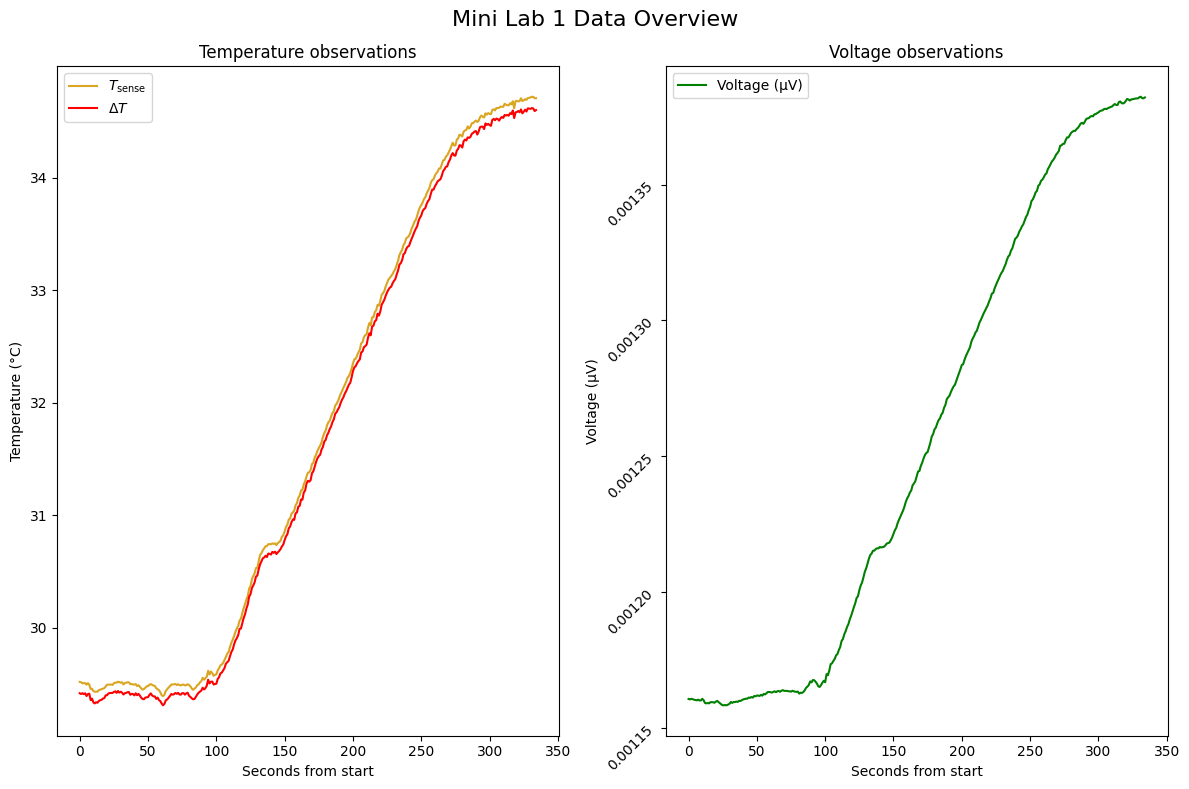

In [73]:
#Visualizing the Data
#Plot for temperature data
fig, axes = plt.subplots (1, 2, figsize = (12, 8))
axes[0].plot(Tsensed, c = 'goldenrod', label=r'$T_\mathrm{sense}$')
axes[0].plot(DelT, c = 'r', label = r'$\Delta T$')
axes[0].legend()
axes[0].set_xlabel('Seconds from start')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature observations')

## Plot for voltage data
axes[1].plot(E, c='green', label = 'Voltage (µV)')
axes[1].legend()
axes[1].set_xlabel('Seconds from start')
axes[1].set_ylabel('Voltage (µV)')
axes[1].set_title('Voltage observations')
axes[1].tick_params(axis='y', rotation=45)

#Making plot pretty
plt.suptitle('Mini Lab 1 Data Overview', fontsize = 16)
plt.tight_layout()

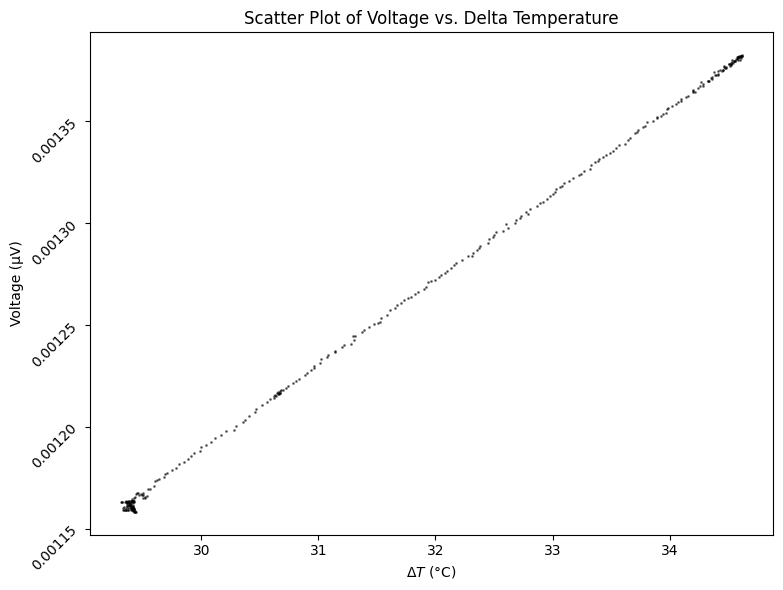

In [74]:
## Making scatter plot of voltage vs delta T

#Defining x and y vars
x = DelT.copy()
y = E.copy()

# Creating scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, c='k', s = 1, alpha=0.5)
plt.xlabel(r'$\Delta T$ (°C)')
plt.ylabel('Voltage (µV)')
plt.title('Scatter Plot of Voltage vs. Delta Temperature')
plt.tight_layout()
plt.tick_params(axis='y', rotation=45)

In [ ]:
m = E / np.sum(x-np.mean(x)**2) # units of µV/°C
b = E #units of µV
m = m.values
b = b.values
#print(f'Slope: {m} µV/K, Intercept: {b} µV')

Slope: [-3.57921088e-09 -3.57871974e-09 -3.57941124e-09 -3.57898181e-09
 -3.57837907e-09 -3.57808321e-09 -3.57765211e-09 -3.57845432e-09
 -3.57754051e-09 -3.57754474e-09 -3.57934274e-09 -3.57792093e-09
 -3.57473236e-09 -3.57421418e-09 -3.57465797e-09 -3.57426321e-09
 -3.57554134e-09 -3.57562248e-09 -3.57550921e-09 -3.57495297e-09
 -3.57626663e-09 -3.57697077e-09 -3.57574253e-09 -3.57436886e-09
 -3.57302989e-09 -3.57204762e-09 -3.57218793e-09 -3.57225047e-09
 -3.57209156e-09 -3.57290308e-09 -3.57377377e-09 -3.57584143e-09
 -3.57475265e-09 -3.57583974e-09 -3.57568841e-09 -3.57628776e-09
 -3.57587862e-09 -3.57718550e-09 -3.57698767e-09 -3.57780174e-09
 -3.57873834e-09 -3.57916184e-09 -3.57953635e-09 -3.57957690e-09
 -3.58082293e-09 -3.58054227e-09 -3.58143492e-09 -3.58079419e-09
 -3.58254147e-09 -3.58223037e-09 -3.58312219e-09 -3.58306640e-09
 -3.58265051e-09 -3.58392525e-09 -3.58299624e-09 -3.58495825e-09
 -3.58439862e-09 -3.58566155e-09 -3.58713665e-09 -3.58713156e-09
 -3.58690672e-09 -

ValueError: operands could not be broadcast together with shapes (335,) (31,) 